In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fiverr/Nr Solutions/BitcoinHeistData.csv")

In [4]:
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [5]:
len(data_df['label'].unique())

29

In [6]:
data_df.shape

(2916697, 10)

In [7]:
data_df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [8]:
data_df.corr()

<ipython-input-8-b47fa4ad56a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_df.corr()


,year,day,length,weight,count,looped,neighbors,income
year,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535
day,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628
length,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488
weight,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774
count,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635
looped,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551
neighbors,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966
income,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000


In [9]:
data_df.dtypes

address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object

In [10]:
data_df['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [11]:
ransomware_list = ['princetonCerber','princetonLocky','montrealCryptoLocker',
                    'montrealCryptXXX','montrealWannaCry','montrealDMALockerv3', 'montrealCryptoTorLocker2015',
                    'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt','montrealDMALocker', 'montrealGlobe',
                    'montrealEDA2','montrealVenusLocker', 'montrealXTPLocker','montrealGlobev3', 'montrealJigSaw',
                    'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy','montrealCryptConsole', 'montrealGlobeImposter',
                    'montrealSam','montrealComradeCircle', 'montrealAPT',
                   'paduaCryptoWall','paduaKeRanger','paduaJigsaw']
data_df.replace(ransomware_list,'ransomeware',inplace = True)


In [12]:
data_df.replace('ransomeware',1,inplace = True)
data_df.replace('white',0,inplace = True)
data_df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,1
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,1
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,1
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,1
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,0
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,0
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,0
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,0


In [13]:
#data_df.drop(['address'],1,inplace = True)
label_encoder = preprocessing.LabelEncoder()
data_df['address']=label_encoder.fit_transform(data_df['address'])
data_df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,23,2017,11,18,0.008333,1,0,2,100050000.0,1
1,128,2016,132,44,0.000244,1,0,1,100000000.0,1
2,169,2016,246,0,1.000000,1,0,2,200000000.0,1
3,217,2016,322,72,0.003906,1,0,2,71200000.0,1
4,293,2016,238,144,0.072848,456,0,1,200000000.0,1


In [14]:
data_df.corr()

,address,year,day,length,weight,count,looped,neighbors,income,label
address,1.000000,0.185803,0.017566,0.000723,0.009506,0.044201,0.008970,0.008869,-0.001169,-0.016943
year,0.185803,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535,0.021367
day,0.017566,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628,-0.008097
length,0.000723,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488,-0.006860
weight,0.009506,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774,0.002676
count,0.044201,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635,-0.008654
looped,0.008970,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551,-0.017810
neighbors,0.008869,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966,-0.000872
income,-0.001169,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000,-0.002716
label,-0.016943,0.021367,-0.008097,-0.006860,0.002676,-0.008654,-0.017810,-0.000872,-0.002716,1.000000


<Axes: >

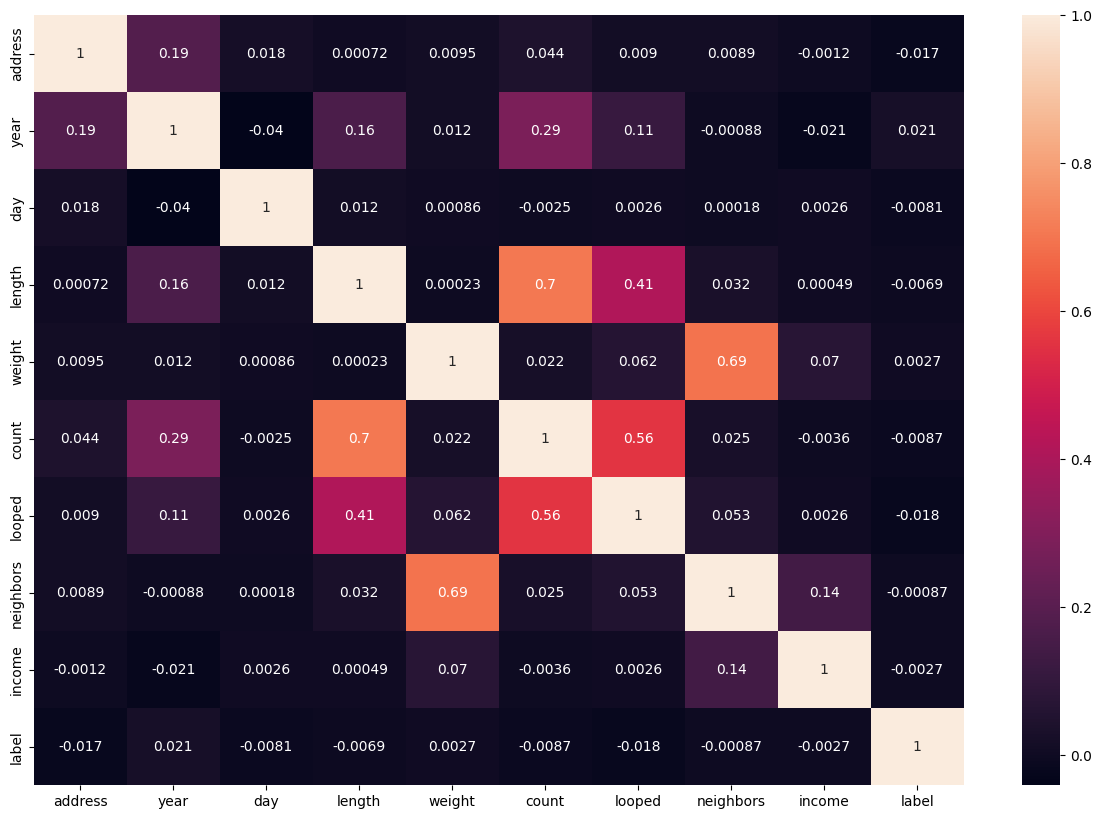

In [15]:
matrix = np.triu(data_df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(data_df.corr(), annot=True)

In [16]:
X = np.array(data_df.drop(['label'],1))
y = np.array(data_df['label'])

<ipython-input-16-496e63ae2b90>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data_df.drop(['label'],1))


In [17]:
X=data_df.drop('label',axis=1)
y=data_df['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [21]:
y_train.value_counts()

0    2300232
1      33125
Name: label, dtype: int64

# ML modelling

**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=2, class_weight='balanced')
rf=rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.989518976925978

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print or display the evaluation metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_test_pred)

print("\nClassification Report:")
class_report = classification_report(y_test, y_test_pred)
print(class_report)

print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 1.0000
Test Accuracy: 0.9895

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    575052
           1       0.85      0.32      0.46      8288

    accuracy                           0.99    583340
   macro avg       0.92      0.66      0.73    583340
weighted avg       0.99      0.99      0.99    583340

Confusion Matrix:
[[574579    473]
 [  5641   2647]]


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(max_depth=18,random_state=2)
dt=dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9885572736311585

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print or display the evaluation metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_test_pred)

print("\nClassification Report:")
class_report = classification_report(y_test, y_test_pred)
print(class_report)

print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.9920
Test Accuracy: 0.9886

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.40      0.50      8288
           2       0.99      1.00      0.99    575052

    accuracy                           0.99    583340
   macro avg       0.82      0.70      0.75    583340
weighted avg       0.99      0.99      0.99    583340

Confusion Matrix:
[[  3354   4934]
 [  1741 573311]]


**KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_test_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.9852213117564371
              precision    recall  f1-score   support

           1       0.39      0.07      0.12      8288
           2       0.99      1.00      0.99    575052

    accuracy                           0.99    583340
   macro avg       0.69      0.53      0.56    583340
weighted avg       0.98      0.99      0.98    583340

[[   580   7708]
 [   913 574139]]


**`XGB Classifier`**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.1)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.989608118764357
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    575052
           1       0.82      0.34      0.49      8288

    accuracy                           0.99    583340
   macro avg       0.91      0.67      0.74    583340
weighted avg       0.99      0.99      0.99    583340

[[574423    629]
 [  5433   2855]]


**LogisticRegression**

In [22]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training data
model = LogisticRegression(solver='lbfgs')  # You can adjust parameters as needed
model.fit(X_train, y_train)


LogisticRegression()

In [23]:
y_test_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.9857921623752871


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    575052
           1       0.00      0.00      0.00      8288

    accuracy                           0.99    583340
   macro avg       0.49      0.50      0.50    583340
weighted avg       0.97      0.99      0.98    583340

[[575052      0]
 [  8288      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Catboost**

In [ ]:
pip install catboost

In [ ]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Create CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss')

# Train the model
catboost_model.fit(X_train, y_train, cat_features=[])

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
y_test_pred = catboost_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.9884784173895156
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    575052
           1       0.83      0.24      0.37      8288

    accuracy                           0.99    583340
   macro avg       0.91      0.62      0.68    583340
weighted avg       0.99      0.99      0.99    583340

[[574633    419]
 [  6302   1986]]


    Accuracy
Random Forest :  98.95%

Decision Tree :   98.86%

KNeighbors Classifier : 98.52%

XGB Classifier: 99%

LogisticRegression : 98.57%




